In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

### Without Disorder

In [4]:
2**32

4294967296

In [11]:
import time
int(time.monotonic_ns()/5000)

1966811576

In [295]:
time    = np.loadtxt("1I_1O/time.csv")
outputs = [pd.read_csv(f"1I_1O/Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]
states  = [pd.read_csv(f"1I_1O/mean_state_Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]

df_state        = pd.DataFrame(np.mean(states,axis=0))
df_state_u      = pd.DataFrame(np.std(states,axis=0)/np.sqrt(len(states)))
df              = outputs[0]
df['Current']   = np.mean(outputs,axis=0)[:,-2]
df['Error']     = np.std(outputs,axis=0)[:,-2]/np.sqrt(len(outputs))

### Capacitance Disorder

In [192]:
time                = np.loadtxt("1I_1O_radius_dis/time.csv")
outputs_r_dis       = [pd.read_csv(f"1I_1O_radius_dis/Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]
states_r_dis        = [pd.read_csv(f"1I_1O_radius_dis/mean_state_Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]
df_state_dis        = pd.DataFrame(np.mean(states_r_dis,axis=0))
df_state_dis_u      = pd.DataFrame(np.std(states_r_dis,axis=0)/np.sqrt(len(states_r_dis)))
df_r_dis            = outputs_r_dis[0]
df_r_dis['Current'] = np.mean(outputs_r_dis,axis=0)[:,-2]
df_r_dis['Error']   = np.std(outputs_r_dis,axis=0)[:,-2]/np.sqrt(len(outputs_r_dis))

### Resistance Disorder

In [297]:
time                    = np.loadtxt("1I_1O_R_dis/time.csv")
outputs_res_dis         = [pd.read_csv(f"1I_1O_R_dis/Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]
states_res_dis          = [pd.read_csv(f"1I_1O_R_dis/mean_state_Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(50)]
df_state_dis            = pd.DataFrame(np.mean(states_res_dis,axis=0))
df_state_dis_u          = pd.DataFrame(np.std(states_res_dis,axis=0)/np.sqrt(len(states_res_dis)))
df_res_dis              = outputs_res_dis[0]
df_res_dis['Current']   = np.mean(outputs_res_dis,axis=0)[:,-2]
df_res_dis['Error']     = np.std(outputs_res_dis,axis=0)[:,-2]/np.sqrt(len(outputs_res_dis))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


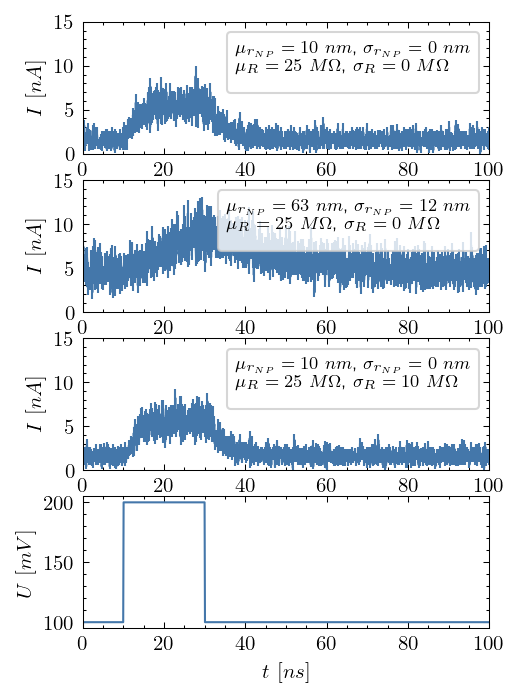

In [298]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight()*2)

    ax  = fig.add_subplot(4,1,1)
    ax.errorbar(time[1:]*10**9, df['Current']/1000, df['Error']/1000)
    ax.set_ylabel("$I$ $[nA]$")
    ax.set_xlim(0,100)
    ax.legend(title="$\mu_{r_{NP}} = 10$ $nm$, $\sigma_{r_{NP}} = 0$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 0$ $M\Omega$", title_fontsize='small', frameon=True)
    ax.set_ylim(0,15)

    ax  = fig.add_subplot(4,1,2)
    ax.errorbar(time[1:]*10**9, df_r_dis['Current']/1000, df_r_dis['Error']/1000)
    ax.set_ylabel("$I$ $[nA]$")
    ax.set_xlim(0,100)
    ax.legend(title="$\mu_{r_{NP}} = 63$ $nm$, $\sigma_{r_{NP}} = 12$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 0$ $M\Omega$", title_fontsize='small', frameon=True)
    ax.set_ylim(0,15)

    ax  = fig.add_subplot(4,1,3)
    ax.errorbar(time[1:]*10**9, df_res_dis['Current']/1000, df_res_dis['Error']/1000)
    ax.set_ylabel("$I$ $[nA]$")
    ax.set_xlim(0,100)
    ax.legend(title="$\mu_{r_{NP}} = 10$ $nm$, $\sigma_{r_{NP}} = 0$ $nm$\n$\mu_R = 25$ $M\Omega$, $\sigma_R = 10$ $M\Omega$", title_fontsize='small', frameon=True)
    ax.set_ylim(0,15)

    ax  = fig.add_subplot(4,1,4)
    ax.plot(time[1:]*10**9, df['E0']*1000)
    ax.set_xlabel("$t$ $[ns]$")
    ax.set_ylabel("$U$ $[mV]$")
    ax.set_xlim(0,100)

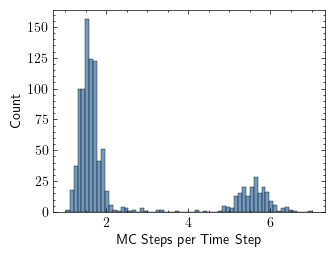

In [170]:
jumps = pd.DataFrame(np.mean(outputs, axis=0))

with plt.style.context(["science","bright"]):
    
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax  = sns.histplot(data=jumps[4])
    ax.set_xlabel("MC Steps per Time Step")

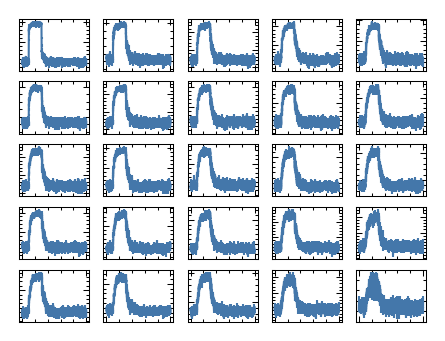

In [153]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)

    for col in df_state.columns:

        ax  = fig.add_subplot(5,5,col+1)
        ax.errorbar(x=time[1:]*10**6, y=df_state[col].values, yerr=df_state_u[col].values)

        ax.set_yticklabels("")
        ax.set_xticklabels("")
    
    # fig.supxlabel("$t$ [$\mu s$]", size='small')
    # fig.supylabel("$q$", size='small')

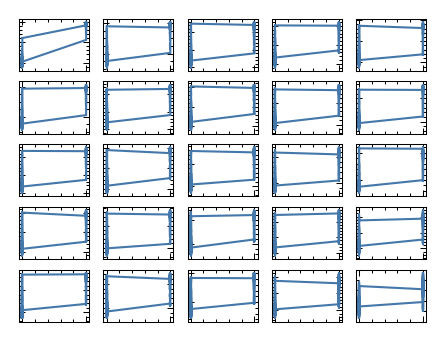

In [154]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)

    for col in df_state.columns:

        ax  = fig.add_subplot(5,5,col+1)
        ax.errorbar(x=df['E0'], y=df_state[col].values, yerr=df_state_u[col].values)

        ax.set_yticklabels("")
        ax.set_xticklabels("")
    
    # fig.supxlabel("$t$ [$\mu s$]", size='small')
    # fig.supylabel("$q$", size='small')

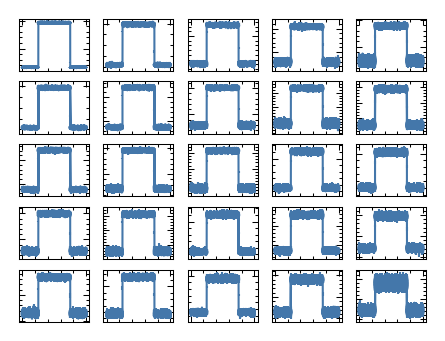

In [115]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)

    for col in df_state.columns:

        ax  = fig.add_subplot(5,5,col+1)
        ax.errorbar(x=time[1:]*10**6, y=df_state[col].values, yerr=df_state_u[col].values)

        ax.set_yticklabels("")
        ax.set_xticklabels("")
    
    # fig.supxlabel("$t$ [$\mu s$]", size='small')
    # fig.supylabel("$q$", size='small')

### Capacitance Disorder

In [116]:
time    = np.loadtxt("1I_1O_radius_dis/time.csv")
outputs = [pd.read_csv(f"1I_1O_radius_dis/Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(10)]
states  = [pd.read_csv(f"1I_1O_radius_dis/mean_state_Nx=5_Ny=5_Nz=1_Ne=2_th{i}.csv") for i in range(10)]

df_state        = pd.DataFrame(np.mean(states,axis=0))
df_state_u      = pd.DataFrame(np.std(states,axis=0)/np.sqrt(len(states)))
df              = outputs[0]
df['Current']   = np.mean(outputs,axis=0)[:,-2]
df['Error']     = np.std(outputs,axis=0)[:,-2]/np.sqrt(len(outputs))

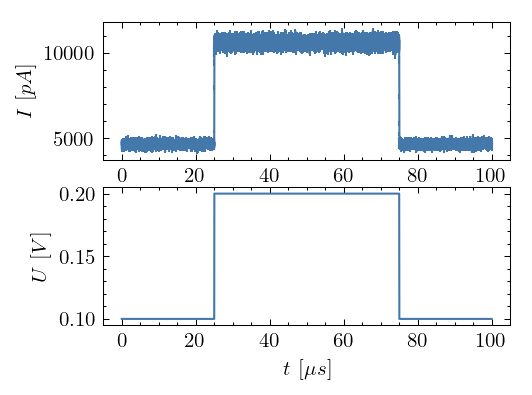

In [117]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot(2,1,1)

    ax.errorbar(time[1:]*10**6, df['Current'], df['Error'])
    ax.set_ylabel("$I$ $[pA]$")

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time[1:]*10**6, df['E0'])
    ax.set_xlabel("$t$ $[\mu s]$")
    ax.set_ylabel("$U$ $[V]$")

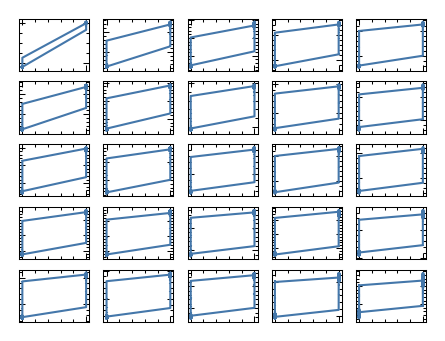

In [118]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)

    for col in df_state.columns:

        ax  = fig.add_subplot(5,5,col+1)
        ax.errorbar(x=df['E0'], y=df_state[col].values, yerr=df_state_u[col].values)

        ax.set_yticklabels("")
        ax.set_xticklabels("")
    
    # fig.supxlabel("$t$ [$\mu s$]", size='small')
    # fig.supylabel("$q$", size='small')